In [1]:
import time
import numpy as np
import pandas as pd
from gmm import GMM
from tqdm import tqdm
import matplotlib.pyplot as plt
from multiprocessing import Pool
from collections import defaultdict
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split

plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 8,6
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("../datasets/2A/consolidated_train.csv")
X = df.drop("class", axis=1).to_numpy()
df.head()

,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.301071,0.207291,0.163574,0.080124,0.054138,0.041107,0.048340,0.104355,0.028275,...,0.211029,0.176437,0.016968,0.029282,0.108093,0.173035,0.205368,0.192215,0.143951,0.131088
1,0,0.149094,0.178650,0.383118,0.217911,0.069717,0.001373,0.000122,0.000015,0.127670,...,0.003387,0.000168,0.121246,0.041306,0.045090,0.160141,0.290756,0.318909,0.022049,0.000504
2,0,0.033218,0.092514,0.107178,0.058289,0.397430,0.066330,0.238052,0.006989,0.000793,...,0.231079,0.003769,0.001465,0.004150,0.006897,0.028931,0.283752,0.127716,0.543488,0.003601
3,0,0.009476,0.132507,0.375351,0.090302,0.271347,0.112000,0.008942,0.000076,0.007553,...,0.096375,0.010620,0.007843,0.000443,0.030304,0.102646,0.246140,0.513321,0.088379,0.010925
4,0,0.169357,0.262299,0.253281,0.152527,0.092209,0.038757,0.016174,0.015396,0.082397,...,0.020676,0.015976,0.072647,0.077484,0.163315,0.186646,0.181931,0.196167,0.090378,0.031433


In [3]:
classes = np.unique(df["class"])
gmm_list = defaultdict(list)
q_list = list(range(2,23))  

for i in classes:
    print("="*50)
    df_select = df[df["class"]==i]
    X_select = df_select.drop("class", axis=1).to_numpy()
    for q in q_list:
        gmm = GMM(q=q)
        gmm.fit(X_select)
        gmm_list[i].append(gmm)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:06<?, ?it/s]


In [4]:
import pickle
fin = open("2a_gmm_results", "wb")
pickle.dump(gmm_list, fin)
fin.close()

In [5]:
df_test = pd.read_csv("../datasets/2A/consolidated_dev.csv")
df_cv = df_test.sample(frac=0.7)
X_cv = df_cv.drop("class", axis=1).to_numpy()
display(df_cv.head())
df_test = df_test.drop(df_cv.index)
X_test = df_test.drop("class", axis=1).to_numpy()
display(df_test.head())

,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
50,0,0.020096,0.121582,0.251251,0.297134,0.243698,0.063812,0.001831,0.000595,0.000046,...,0.001129,0.000229,0.000015,0.004715,0.072189,0.274567,0.217438,0.312408,0.118591,0.000076
93,1,0.016190,0.070450,0.149475,0.172317,0.160706,0.052002,0.315750,0.063110,0.005096,...,0.081055,0.326187,0.040756,0.124664,0.062195,0.232315,0.113998,0.013870,0.088135,0.324066
248,3,0.418777,0.264771,0.149292,0.070969,0.020889,0.018677,0.044632,0.011993,0.409897,...,0.044724,0.008041,0.798553,0.093353,0.025833,0.010300,0.005859,0.049088,0.016907,0.000107
235,3,0.076233,0.122635,0.154785,0.225784,0.140121,0.126801,0.111191,0.042450,0.082153,...,0.061615,0.003021,0.120819,0.230820,0.222092,0.154480,0.049164,0.011871,0.032303,0.178452
88,1,0.061432,0.056458,0.089691,0.046631,0.015091,0.389923,0.307800,0.032974,0.065552,...,0.244324,0.237625,0.151382,0.085175,0.026016,0.027939,0.306961,0.045227,0.352020,0.005280


,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.399170,0.279617,0.052292,0.046127,0.066757,0.082733,0.060654,0.012650,0.071945,...,0.063065,0.008881,0.145233,0.202499,0.071503,0.222473,0.248734,0.058716,0.044266,0.006577
1,0,0.150986,0.175201,0.154205,0.274918,0.140121,0.068146,0.029816,0.006607,0.100555,...,0.024231,0.006195,0.123734,0.251984,0.176926,0.113693,0.048813,0.262314,0.018860,0.003677
2,0,0.256210,0.246597,0.150299,0.097305,0.074341,0.069366,0.032928,0.072952,0.110901,...,0.113846,0.038269,0.140778,0.132614,0.082352,0.156189,0.146027,0.110016,0.113525,0.118500
6,0,0.029694,0.202667,0.359497,0.151443,0.101562,0.093689,0.054306,0.007141,0.008957,...,0.096191,0.246933,0.006073,0.029541,0.055450,0.081680,0.186951,0.240280,0.033554,0.366470
7,0,0.197052,0.157166,0.153442,0.105743,0.080338,0.073410,0.063812,0.169037,0.217148,...,0.078217,0.039780,0.494904,0.145981,0.121979,0.084595,0.095444,0.029922,0.010056,0.017120


In [6]:
accuracy_list = []
test_accuracy_list = []
for i in tqdm(range(len(q_list))):
    gmm0 = gmm_list[0][i]
    gmm1 = gmm_list[1][i]
    gmm2 = gmm_list[2][i]
    gmm3 = gmm_list[3][i]
    gmm4 = gmm_list[4][i]
    
    # Training
    a = gmm0.indv_log_likelihood(X)
    b = gmm1.indv_log_likelihood(X)
    c = gmm2.indv_log_likelihood(X)
    d = gmm3.indv_log_likelihood(X)
    e = gmm4.indv_log_likelihood(X)

    f = np.hstack((a, b, c, d, e))
    pred = np.argmax(f, axis=1)
    accuracy_list.append(np.sum(pred == df["class"])/df["class"].size)
    
    # Testing
    a = gmm0.indv_log_likelihood(X_test)
    b = gmm1.indv_log_likelihood(X_test)
    c = gmm2.indv_log_likelihood(X_test)
    d = gmm3.indv_log_likelihood(X_test)
    e = gmm4.indv_log_likelihood(X_test)

    f = np.hstack((a, b, c, d, e))
    pred = np.argmax(f, axis=1)
    test_accuracy_list.append(np.sum(pred == df_test["class"])/df_test["class"].size)

 10%|▉         | 2/21 [00:29<04:45, 15.01s/it]/home/sowmya/Desktop/cs5691/assignment/assignment2/codes/gmm.py:99: RuntimeWarning: divide by zero encountered in log
  lk[i] = np.log(val)
100%|██████████| 21/21 [24:07<00:00, 68.94s/it] 


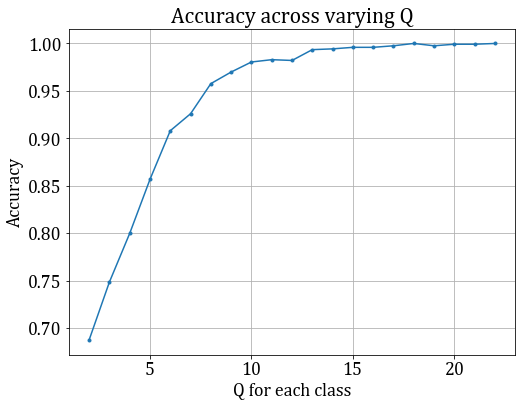

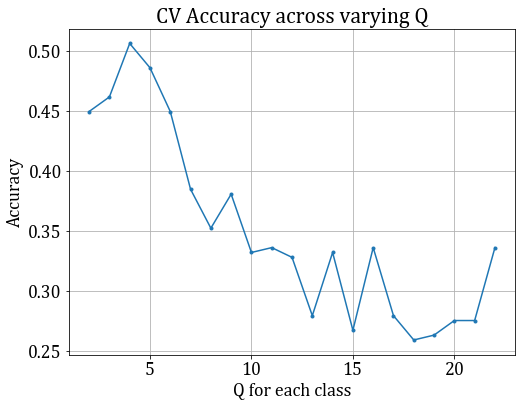

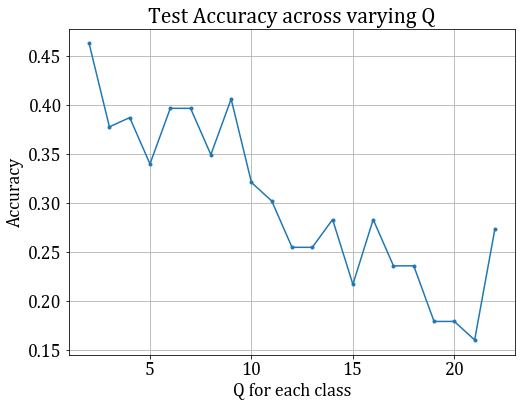

In [7]:
plt.plot(q_list, accuracy_list, '.-')
plt.title("Accuracy across varying Q")
plt.xlabel("Q for each class")
plt.ylabel("Accuracy")
plt.show()

plt.plot(q_list, cv_accuracy_list, '.-')
plt.title("CV Accuracy across varying Q")
plt.xlabel("Q for each class")
plt.ylabel("Accuracy")
plt.show()

plt.plot(q_list, test_accuracy_list, '.-')
plt.title("Test Accuracy across varying Q")
plt.xlabel("Q for each class")
plt.ylabel("Accuracy")
plt.show()

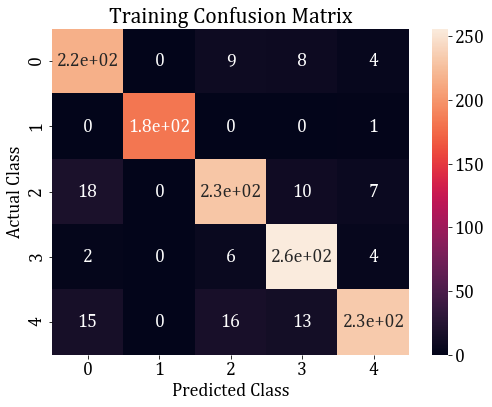

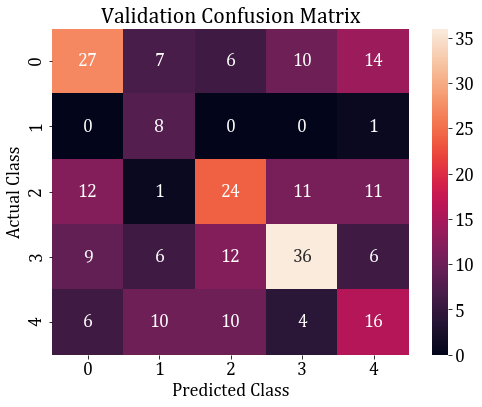

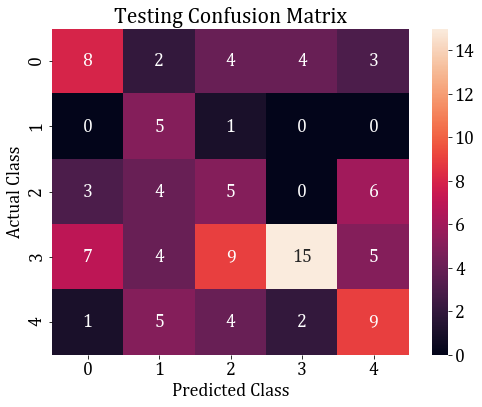

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_model = np.argmax(acc["Sum"])

gmm0 = gmm_list[0][best_model]
gmm1 = gmm_list[1][best_model]
gmm2 = gmm_list[2][best_model]
gmm3 = gmm_list[3][best_model]
gmm4 = gmm_list[4][best_model]

# Training
a = gmm0.indv_log_likelihood(X)
b = gmm1.indv_log_likelihood(X)
c = gmm2.indv_log_likelihood(X)
d = gmm3.indv_log_likelihood(X)
e = gmm4.indv_log_likelihood(X)

f = np.hstack((a, b, c, d, e))
pred = np.argmax(f, axis=1)
conf_mat = confusion_matrix(pred, df["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# CV
a = gmm0.indv_log_likelihood(X_cv)
b = gmm1.indv_log_likelihood(X_cv)
c = gmm2.indv_log_likelihood(X_cv)
d = gmm3.indv_log_likelihood(X_cv)
e = gmm4.indv_log_likelihood(X_cv)

f = np.hstack((a, b, c, d, e))
pred = np.argmax(f, axis=1)
conf_mat = confusion_matrix(pred, df_cv["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Testing
a_test = gmm0.indv_log_likelihood(X_test)
b_test = gmm1.indv_log_likelihood(X_test)
c_test = gmm2.indv_log_likelihood(X_test)
d_test = gmm3.indv_log_likelihood(X_test)
e_test = gmm4.indv_log_likelihood(X_test)

f_test = np.hstack((a_test, b_test, c_test, d_test, e_test))
pred_test = np.argmax(f_test, axis=1)
conf_mat = confusion_matrix(pred_test, df_test["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

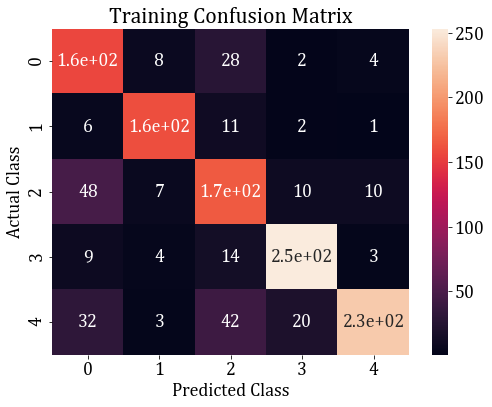

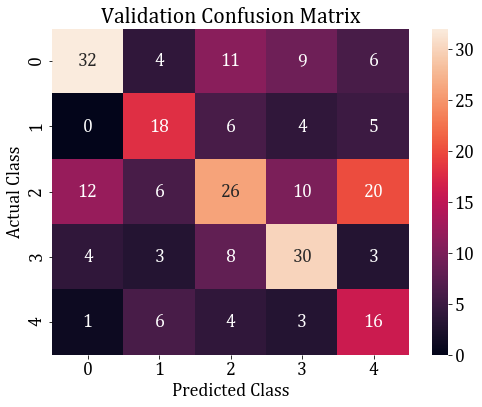

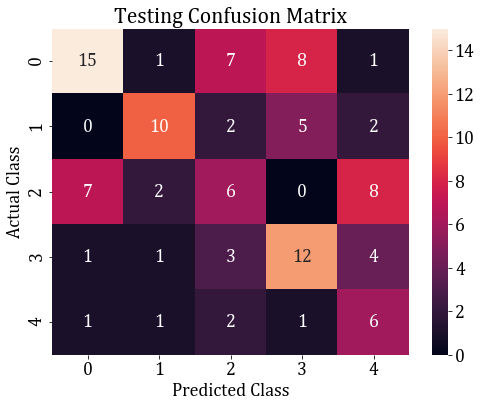

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

gmm0 = gmm_list[0][0]
gmm1 = gmm_list[1][0]
gmm2 = gmm_list[2][0]
gmm3 = gmm_list[3][4]
gmm4 = gmm_list[4][3]

# Training
a = gmm0.indv_log_likelihood(X)
b = gmm1.indv_log_likelihood(X)
c = gmm2.indv_log_likelihood(X)
d = gmm3.indv_log_likelihood(X)
e = gmm4.indv_log_likelihood(X)

f = np.hstack((a, b, c, d, e))
pred = np.argmax(f, axis=1)
conf_mat = confusion_matrix(pred, df["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# CV
a = gmm0.indv_log_likelihood(X_cv)
b = gmm1.indv_log_likelihood(X_cv)
c = gmm2.indv_log_likelihood(X_cv)
d = gmm3.indv_log_likelihood(X_cv)
e = gmm4.indv_log_likelihood(X_cv)

f = np.hstack((a, b, c, d, e))
pred = np.argmax(f, axis=1)
conf_mat = confusion_matrix(pred, df_cv["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Testing
a_test = gmm0.indv_log_likelihood(X_test)
b_test = gmm1.indv_log_likelihood(X_test)
c_test = gmm2.indv_log_likelihood(X_test)
d_test = gmm3.indv_log_likelihood(X_test)
e_test = gmm4.indv_log_likelihood(X_test)

f_test = np.hstack((a_test, b_test, c_test, d_test, e_test))
pred_test = np.argmax(f_test, axis=1)
conf_mat = confusion_matrix(pred_test, df_test["class"])
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()